<a href="https://colab.research.google.com/github/paulopetrillo/FIAP_TECH_CHALENGE_01/blob/main/TECH_CHALENGE_Periodo_2y.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# !pip install yfinance

In [53]:
# !pip install pandas

In [54]:
# Carrega/importa bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
import matplotlib

import warnings
warnings.filterwarnings('ignore')


# carrega bilbioteca yfinance (sugerida pelo Prof. Daniel Lima) para carregar
# automaticamente os dados da BVSP (https://br.investing.com/indices/bovespa-historical-data)
import yfinance as yf

print('Versão do pandas => %s' % pd.__version__)
print('Versão do numpy => %s' % np.__version__)
print('Versão do matplotlib => %s' % matplotlib.__version__)
print('Versão do seaborn => %s' % sns.__version__ )
print('Versão do yfinance => %s' % yf.__version__ )



# "^BVSP" parametro para pegar a cotação da BVSP (Ibovespa (IBOV))
dados = yf.Ticker("^BVSP")

Versão do pandas => 2.2.2
Versão do numpy => 2.3.2
Versão do matplotlib => 3.10.0
Versão do seaborn => 0.13.2
Versão do yfinance => 0.2.65


In [55]:
# paranmetros completos para dowload dos dados da BVSP.
# Conforme: https://ranaroussi.github.io/yfinance/
dados = yf.Ticker("^BVSP")
dados.info
dados.calendar
dados.analyst_price_targets
dados.quarterly_income_stmt
# dados.history(start='2022-01-01', end='2025-07-19')
# dat.history(period='3y')
# dat.option_chain(dat.options[4]).calls

ERROR:yfinance:HTTP Error 404: 
ERROR:yfinance:HTTP Error 404: 


""


In [56]:
# documentação em: https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html
# https://github.com/ranaroussi/yfinance
# ----------------------------------------------------------------------------------
# periodstr
# Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max Default: 1mo Either Use period parameter or use start and end

# intervalstr
# Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo Intraday data cannot extend last 60 days

# start: str
# Download start date string (YYYY-MM-DD) or _datetime, inclusive. Default is 99 years ago E.g. for start=”2020-01-01”, the first data point will be on “2020-01-01”

# end: str
# Download end date string (YYYY-MM-DD) or _datetime, exclusive. Default is now E.g. for end=”2023-01-01”, the last data point will be on “2022-12-31”

In [57]:
# Atribuinda os dados a variável dados.
# dados = dados.history(period="max")
# dados = dados.history(start="2000-01-01", end="2025-08-10")
dados = dados.history(period='2y')


# transforma dados em um Dataframe.
dados = pd.DataFrame(dados)

# verificando os tipos de cada coluna.
dados.info()

# Observação:
# A coluna "close" dos dados baixados refere-se a coluna "Último"
# dos dados do site "https://br.investing.com/indices/bovespa-historical-data".

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2023-08-21 00:00:00-03:00 to 2025-08-21 00:00:00-03:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          500 non-null    float64
 1   High          500 non-null    float64
 2   Low           500 non-null    float64
 3   Close         500 non-null    float64
 4   Volume        500 non-null    int64  
 5   Dividends     500 non-null    float64
 6   Stock Splits  500 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 31.2 KB


In [58]:
# Verifica alguns valores do dataframe.
dados.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-08-15 00:00:00-03:00,136354.0,136431.0,135583.0,136341.0,9291000,0.0,0.0
2025-08-18 00:00:00-03:00,136341.0,137902.0,136341.0,137322.0,8089900,0.0,0.0
2025-08-19 00:00:00-03:00,137321.0,137321.0,133997.0,134432.0,8684100,0.0,0.0
2025-08-20 00:00:00-03:00,134431.0,134964.0,134122.0,134667.0,6845000,0.0,0.0
2025-08-21 00:00:00-03:00,134664.0,134837.0,133874.0,134511.0,6516300,0.0,0.0


In [59]:
# # selecionar os dados de janeiro de 2023 do dataframe dados
# dados.loc[dados.index > '2023-01-02']

In [60]:
# # Descrição inicial dos campos
# dados.describe()

In [61]:
# # Transpõe a tabela de resumo de dados estatísticos (describe).
# dados.describe().T

In [62]:
# Observação 1:
# Campos "Dividends" e "Stock Splits" não tem dados, portanto podem ser retirados.

# Retirando as colunas  "Dividends" e "Stock Splits"
dados = dados.drop(labels=['Dividends', 'Stock Splits'], axis=1)
dados.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-08-21 00:00:00-03:00,115404.0,115425.0,114067.0,114429.0,9794400
2023-08-22 00:00:00-03:00,114433.0,116286.0,114433.0,116156.0,9828500
2023-08-23 00:00:00-03:00,116160.0,118135.0,116159.0,118135.0,11542800
2023-08-24 00:00:00-03:00,118135.0,118136.0,116848.0,117026.0,9196200
2023-08-25 00:00:00-03:00,117025.0,117252.0,115397.0,115837.0,9214100


In [63]:
# Obsevação 2:
# A coluna "Date" está como índice da tabela.

# Mostra os dados
dados.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-08-21 00:00:00-03:00,115404.0,115425.0,114067.0,114429.0,9794400
2023-08-22 00:00:00-03:00,114433.0,116286.0,114433.0,116156.0,9828500
2023-08-23 00:00:00-03:00,116160.0,118135.0,116159.0,118135.0,11542800
2023-08-24 00:00:00-03:00,118135.0,118136.0,116848.0,117026.0,9196200
2023-08-25 00:00:00-03:00,117025.0,117252.0,115397.0,115837.0,9214100


In [64]:
from sqlite3 import Timestamp
from os import times_result
# Vamos criar uma coluna com os dados do indice do tipo data.

# Importa biblioteca para tratar datas
from datetime import datetime

# Cria coluna com as datas.
dados['Data'] = dados.index

# Formata para dia.mês.ano (o método "".dt.date" deixa o campo com tipo object).
dados['Data'] = pd.to_datetime(dados['Data'], format='%d-%m-%Y').dt.date

# Define o indice do Data-Frame com a Data (facilita na busca por datas).
dados.index = pd.to_datetime(dados.Data, format='%d-%m-%Y')
# dados.index = pd.to_datetime(dados.index, format='%d-%m-%Y') ##<<< bastaria nesta celula

# Transforma o tipo da coluna "Data" de 'Object' para 'datetime64'.
dados['Data'] = pd.to_datetime(dados['Data'], format='%d-%m-%Y')

# Informações dos dados (quantidade e tipo de dados).
dados.info()
dados.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2023-08-21 to 2025-08-21
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Open    500 non-null    float64       
 1   High    500 non-null    float64       
 2   Low     500 non-null    float64       
 3   Close   500 non-null    float64       
 4   Volume  500 non-null    int64         
 5   Data    500 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 27.3 KB


,Open,High,Low,Close,Volume,Data
Data,,,,,,
2023-08-21,115404.0,115425.0,114067.0,114429.0,9794400,2023-08-21
2023-08-22,114433.0,116286.0,114433.0,116156.0,9828500,2023-08-22
2023-08-23,116160.0,118135.0,116159.0,118135.0,11542800,2023-08-23
2023-08-24,118135.0,118136.0,116848.0,117026.0,9196200,2023-08-24
2023-08-25,117025.0,117252.0,115397.0,115837.0,9214100,2023-08-25


In [65]:
# Testa busca de linhas do dataframe usando a data como indíce.
dados.loc['01-05-2024']

,2024-01-05
Open,131218.0
High,132635.0
Low,130579.0
Close,132023.0
Volume,9199700
Data,2024-01-05 00:00:00


In [66]:
# Alterando a ordem das colunas, apenas para ficar na mesma sequência que o site.
dados = dados[['Close', 'Open', 'High', 'Low', 'Volume', 'Data']]
dados.head()

,Close,Open,High,Low,Volume,Data
Data,,,,,,
2023-08-21,114429.0,115404.0,115425.0,114067.0,9794400,2023-08-21
2023-08-22,116156.0,114433.0,116286.0,114433.0,9828500,2023-08-22
2023-08-23,118135.0,116160.0,118135.0,116159.0,11542800,2023-08-23
2023-08-24,117026.0,118135.0,118136.0,116848.0,9196200,2023-08-24
2023-08-25,115837.0,117025.0,117252.0,115397.0,9214100,2023-08-25


In [67]:
# # Executar está célula caso queira apagar (dropar) a coluna "Data".
# dados.drop(labels=['Data'], axis=1, inplace=True)
# dados.head()

In [68]:
# Renomei as colunas conforme dados da BVSP.
dados.rename(columns={'Close':'Ultimo',
                      'Open':'Abertura',
                      'High':'Maxima',
                      'Low':'Minima'},inplace=True)
dados.info()
dados.tail()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2023-08-21 to 2025-08-21
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Ultimo    500 non-null    float64       
 1   Abertura  500 non-null    float64       
 2   Maxima    500 non-null    float64       
 3   Minima    500 non-null    float64       
 4   Volume    500 non-null    int64         
 5   Data      500 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 43.5 KB


,Ultimo,Abertura,Maxima,Minima,Volume,Data
Data,,,,,,
2025-08-15,136341.0,136354.0,136431.0,135583.0,9291000,2025-08-15
2025-08-18,137322.0,136341.0,137902.0,136341.0,8089900,2025-08-18
2025-08-19,134432.0,137321.0,137321.0,133997.0,8684100,2025-08-19
2025-08-20,134667.0,134431.0,134964.0,134122.0,6845000,2025-08-20
2025-08-21,134511.0,134664.0,134837.0,133874.0,6516300,2025-08-21


In [113]:
# Verifica se o tipo de dado do indice é DatetimeIndex.
type(dados.index)

pandas.core.indexes.datetimes.DatetimeIndex

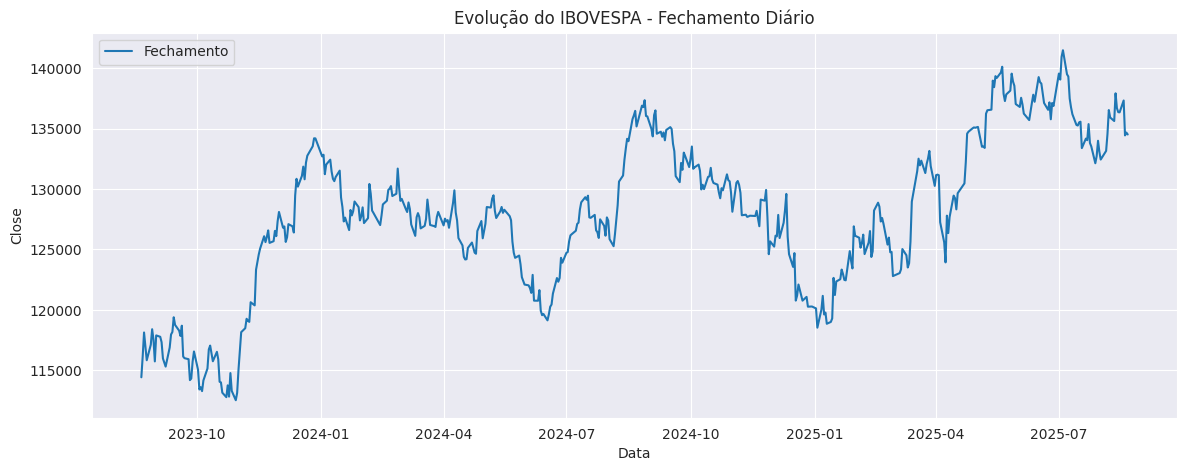

In [70]:
# Plotando os resultados do Valor de fechamento da bolsa (campo chamado "Último").
#plt.plot(dados.index, dados['Ultimo'])
#plt.plot(dados.Data, dados['Último'])


# Plot fechamento
plt.figure(figsize=(14, 5))
plt.plot(dados['Data'], dados['Ultimo'], label='Fechamento')
plt.title('Evolução do IBOVESPA - Fechamento Diário')
plt.xlabel('Data')
plt.ylabel('Close')
plt.grid(True)
plt.legend()
plt.show()

In [71]:
# Possibilidades
# resultados = seasonal_decompose(dados['Ultimo'], model='additive', period=250) # 1 ano
# resultados = seasonal_decompose(dados['Ultimo'], model='additive', period=120) # 6 mese
# resultados = seasonal_decompose(dados['Ultimo'], model='additive', period=40) # 2 meses
resultados = seasonal_decompose(dados['Ultimo'], model='additive', period=20) # 1 mês
print(resultados.observed.head())
print(resultados.trend.head())
print(resultados.seasonal.head())
print(resultados.resid.head())

Data
2023-08-21    114429.0
2023-08-22    116156.0
2023-08-23    118135.0
2023-08-24    117026.0
2023-08-25    115837.0
Name: Ultimo, dtype: float64
Data
2023-08-21   NaN
2023-08-22   NaN
2023-08-23   NaN
2023-08-24   NaN
2023-08-25   NaN
Name: trend, dtype: float64
Data
2023-08-21     25.125521
2023-08-22   -208.195312
2023-08-23   -255.592187
2023-08-24   -104.491146
2023-08-25      8.709896
Name: seasonal, dtype: float64
Data
2023-08-21   NaN
2023-08-22   NaN
2023-08-23   NaN
2023-08-24   NaN
2023-08-25   NaN
Name: resid, dtype: float64


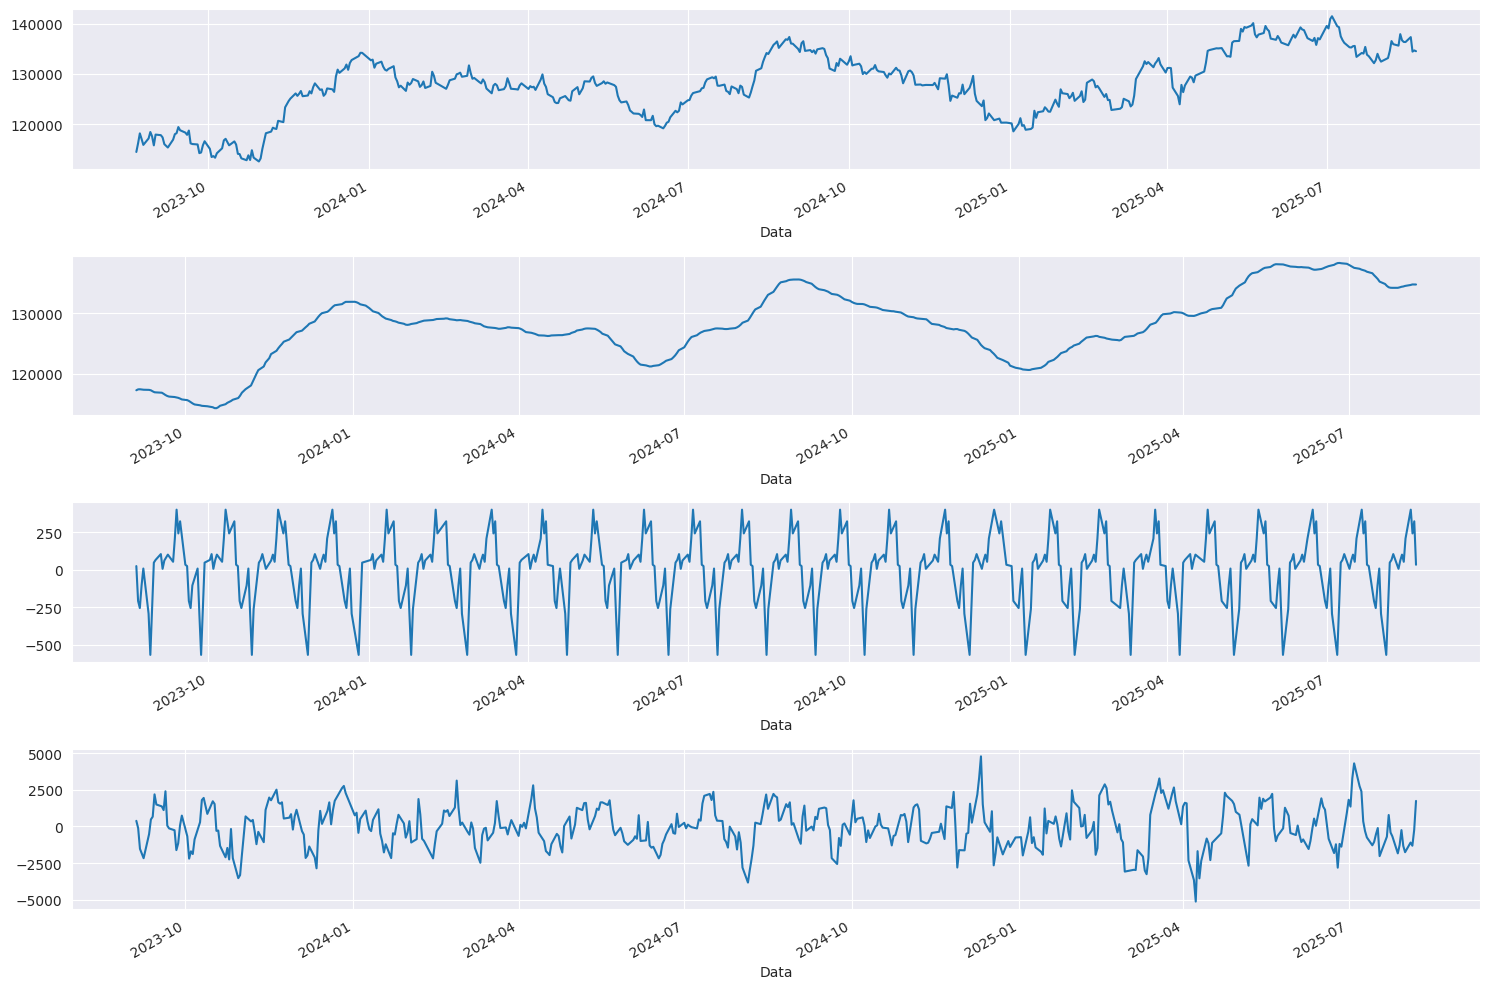

In [72]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,10))
resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.tight_layout()

In [73]:
# tendência - direção (seta para cima, seta para baixo)
# sazonalidade - recorrência das oscilações
# resíduos - o que sobra do sinal - erros - desvio da média

In [74]:
# Veridficação quanto a série ser "estacionário" ou "não estacionário".

# ADF (Augmented Dickey-Fuller)
# H0 - Hipótese nula <=> Série NÃO é estacionário.
# H1 - Hipótese altrenativa <=> Sério é estacionário.

# p-value =< 0.05 (5%), então rejeitamos H0 com nível de confiança de 95%.
# SE (p-value menor ou igual À 5%) ENTÃO (rejeita H0)

# Mais genericamente:
# SE (teste aplicado =< p-value), ENTÃO (rejeitamos H0), ou ainda
# SE (teste aplicado menor ou igual à p-value), ENTÃO (rejeitamos H0).

In [75]:
from statsmodels.tsa.stattools import adfuller

In [76]:
sns.set_style('darkgrid')

In [77]:
x = dados['Ultimo'].values

In [78]:
result =  adfuller(x)

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values: {result[4]}')

for key, value in result[4].items():
  print(f'{key}: {value}')

# ===========================
# Resultado do teste Adfuller
# ===========================
# ADF Statistic: -2.454905010302241
# p-value: 0.12683537930399336
# Critical Values: {'1%': np.float64(-3.4435228622952065),
#                   '5%': np.float64(-2.867349510566146),
#                   '10%': np.float64(-2.569864247011056)}
# 1%: -3.4435228622952065
# 5%: -2.867349510566146
# 10%: -2.569864247011056

ADF Statistic: -2.454905010302241
p-value: 0.12683537930399336
Critical Values: {'1%': np.float64(-3.4435228622952065), '5%': np.float64(-2.867349510566146), '10%': np.float64(-2.569864247011056)}
1%: -3.4435228622952065
5%: -2.867349510566146
10%: -2.569864247011056


<Axes: xlabel='Data'>

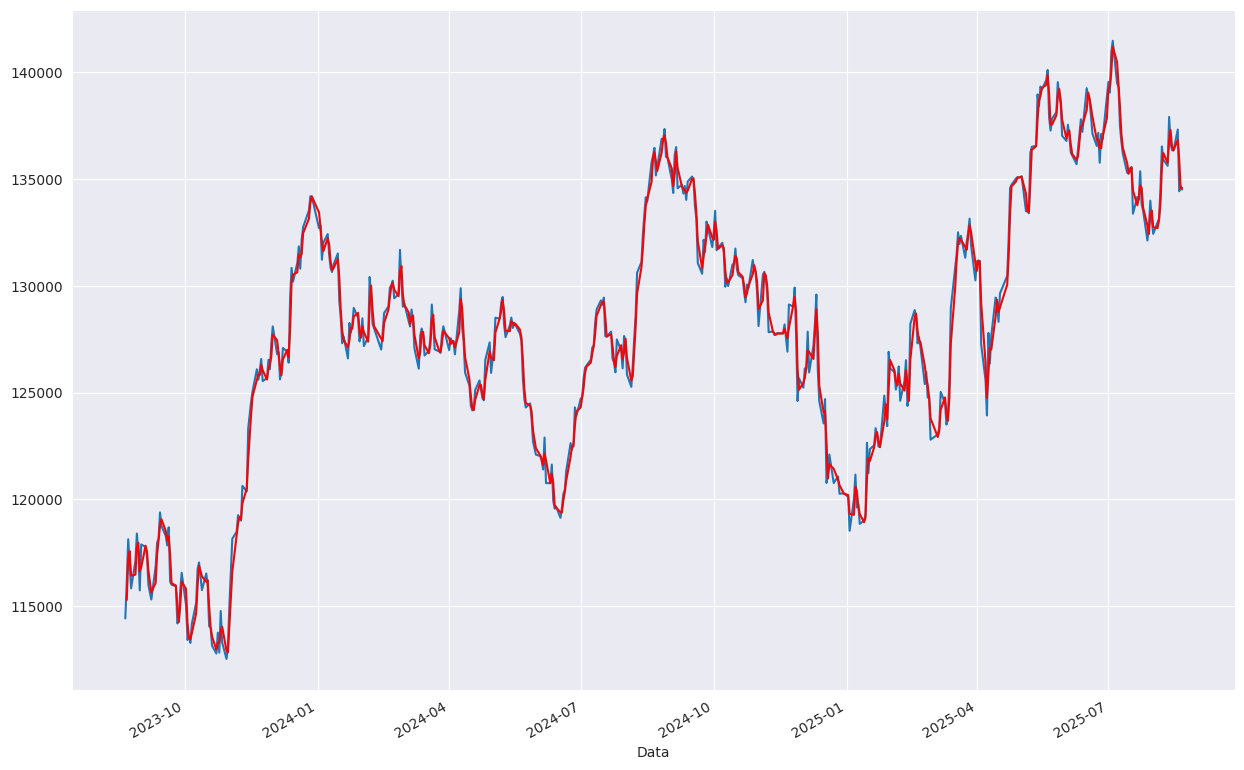

In [79]:
# Média Móvel
# No caso do modelo ARIMA:
# Significado: Quantos erros passados das previsões são usados no modelo
# Por exemplo: Usa os 2 últimos erros de previsão.
# Fórmula: y_t=c+ϵ_t+θ_1 8 ϵ_(t−1) + θ_28ϵ_(t−2)
# Interpretação: Corrige previsões com base nos erros recentes

ma = dados.Ultimo.rolling(2).mean()

f, ax = plt.subplots(figsize=(15,10))
#dados.select_dtypes(include=np.number).plot(ax=ax, legend=False)
dados.Ultimo.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r') # ma <=> moving average (curva masi suaves - menor influencia de variação)

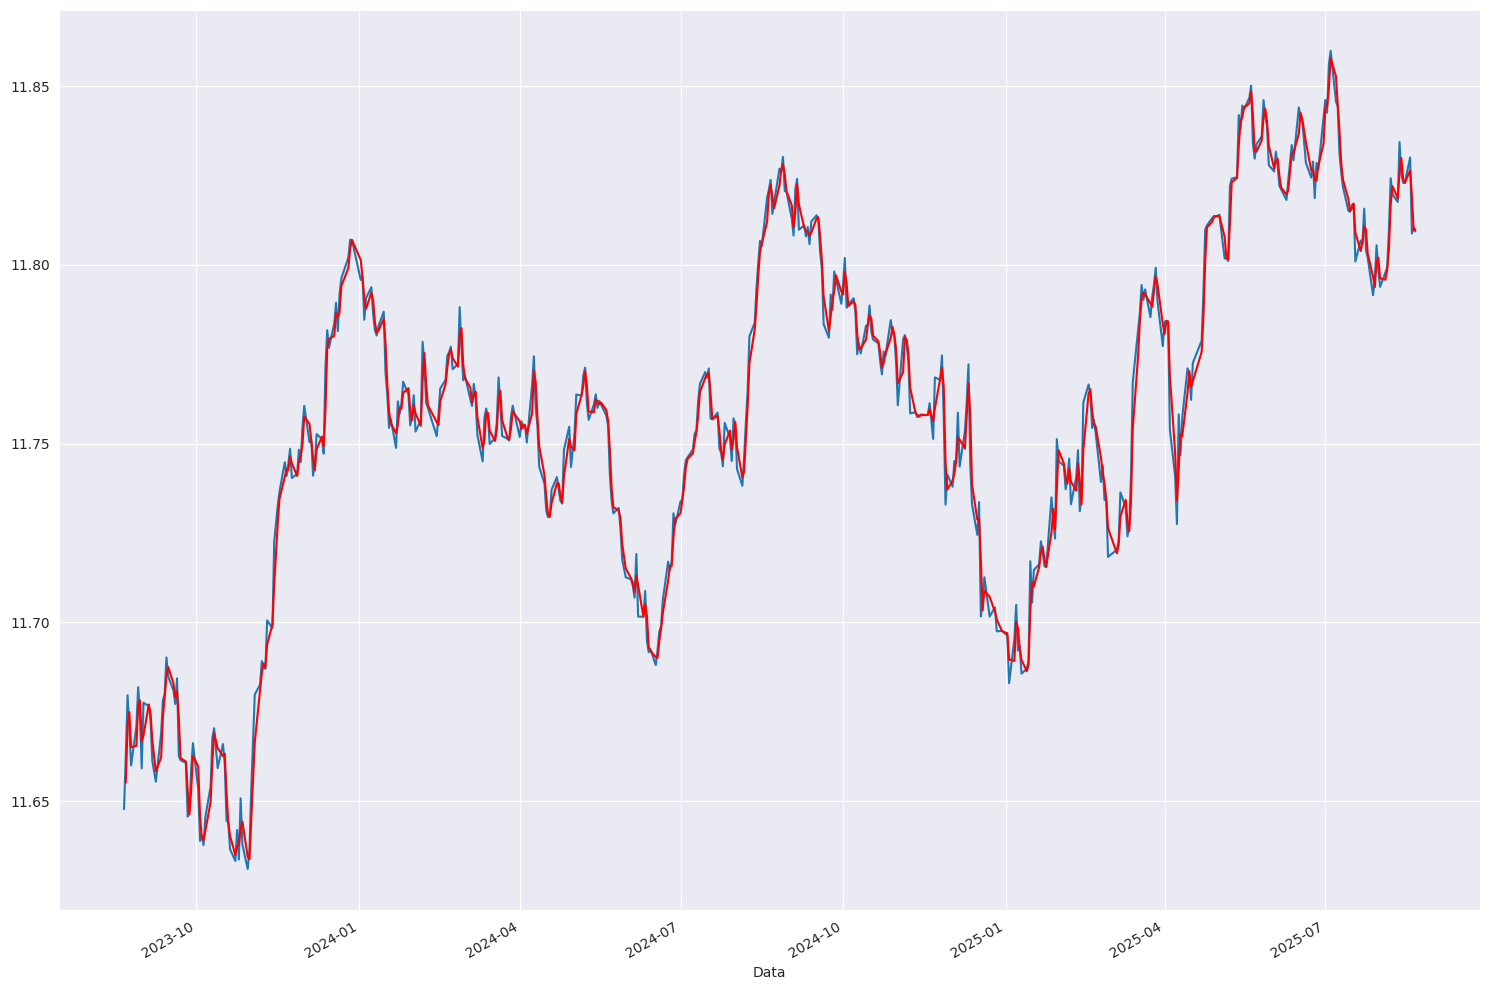

In [80]:
# aplicação do logaritmo

dados_Ultimo_log = np.log(dados.Ultimo)
ma_log = dados_Ultimo_log.rolling(2).mean()

f, ax = plt.subplots(figsize=(15,10))
dados_Ultimo_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

In [81]:
# # rolling = 5 (dias)
# dados_Ultimo_log = np.log(dados.Ultimo)
# ma_5_log = dados_Ultimo_log.rolling(5).mean()

# f, ax = plt.subplots(figsize=(15,10))
# dados_Ultimo_log.plot(ax=ax, legend=False)
# ma_5_log.plot(ax=ax, legend=False, color='r')
# plt.tight_layout()

In [82]:
# # rolling = 1 (dia) => Observe que fica identico ao grágfico original.
# dados_Ultimo_log = np.log(dados.Ultimo)
# ma_1_log = dados_Ultimo_log.rolling(1).mean()

# f, ax = plt.subplots(figsize=(15,10))
# dados_Ultimo_log.plot(ax=ax, legend=False)
# ma_1_log.plot(ax=ax, legend=False, color='r')
# plt.tight_layout()

In [83]:
# # rolling = 30 (dias)
# dados_Ultimo_log = np.log(dados.Ultimo)
# ma_30_log = dados_Ultimo_log.rolling(30).mean()

# f, ax = plt.subplots(figsize=(15,10))
# dados_Ultimo_log.plot(ax=ax, legend=False)
# ma_30_log.plot(ax=ax, legend=False, color='r')
# plt.tight_layout()

In [84]:
# # rolling = 12 (dias)
# dados_Ultimo_s = (dados_Ultimo_log - ma_log).dropna()

# # media (ma_s)
# ma_s = dados_Ultimo_s.rolling(12).mean()

# # desvio padrão (std)
# std = dados_Ultimo_s.rolling(12).std()

# f, ax = plt.subplots(figsize=(15,10))
# dados_Ultimo_s.plot(ax=ax, legend=False)
# ma_s.plot(ax=ax, legend=False, color='r') # media => linha vermelha
# std.plot(ax=ax, legend=False, color='g')  # desvio padrão => linha verde
# plt.tight_layout()


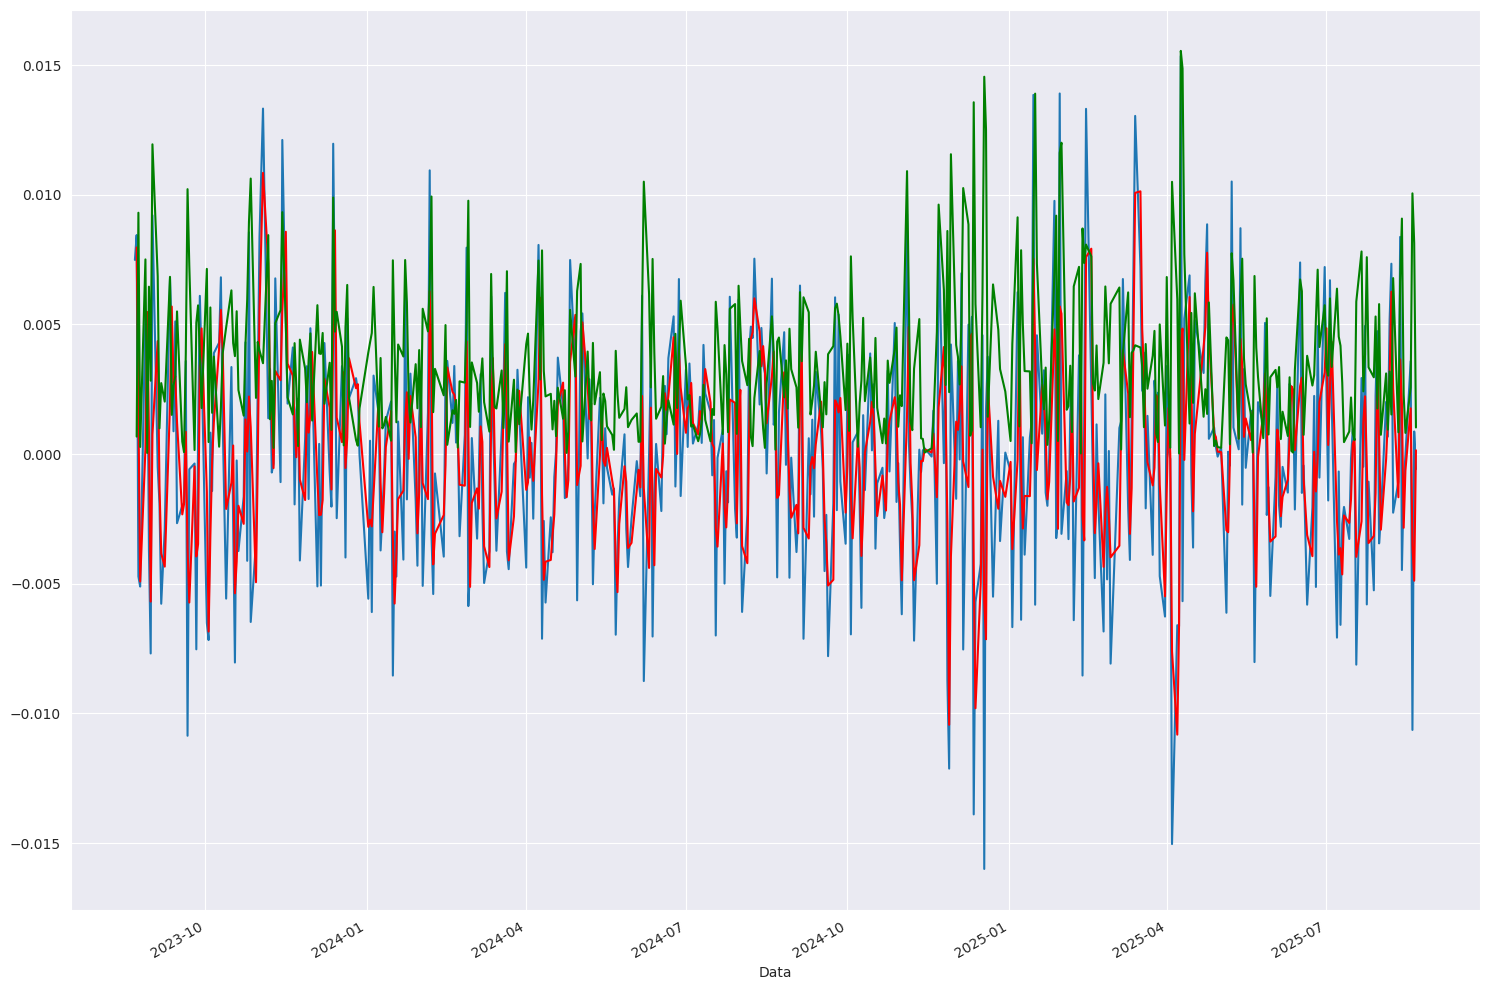

In [85]:
dados_Ultimo_s = (dados_Ultimo_log - ma_log).dropna()

# media (ma_2_s)
ma_2_s = dados_Ultimo_s.rolling(2).mean()

# desvio padrão (std_20)
std_20 = dados_Ultimo_s.rolling(2).std()

f, ax = plt.subplots(figsize=(15,10))
dados_Ultimo_s.plot(ax=ax, legend=False)
ma_2_s.plot(ax=ax, legend=False, color='r') # media => linha vermelha
std_20.plot(ax=ax, legend=False, color='g')  # desvio padrão => linha verde
plt.tight_layout()

In [112]:
dados_Ultimo_s.head()

,Ultimo
Data,
2023-08-22,0.007490
2023-08-23,0.008447
2023-08-24,-0.004716
2023-08-25,-0.005106
2023-08-28,0.005512


In [86]:
X_s = dados_Ultimo_s.values
result_s = adfuller(X_s)

print("Teste ADF")
print(f"Teste Estatístico: {result_s[0]}")
print(f"P-Value: {result_s[1]}")
print("Valores críticos:")

for key, value in result_s[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -22.855319485956844
P-Value: 0.0
Valores críticos:
	1%: -3.4435494520411605
	5%: -2.8673612117611267
	10%: -2.5698704830567247


Teste ADF
Teste Estatístico: -22.855319485957175
P-Value: 0.0
Valores críticos:
	1%: -3.4435494520411605
	5%: -2.8673612117611267
	10%: -2.5698704830567247


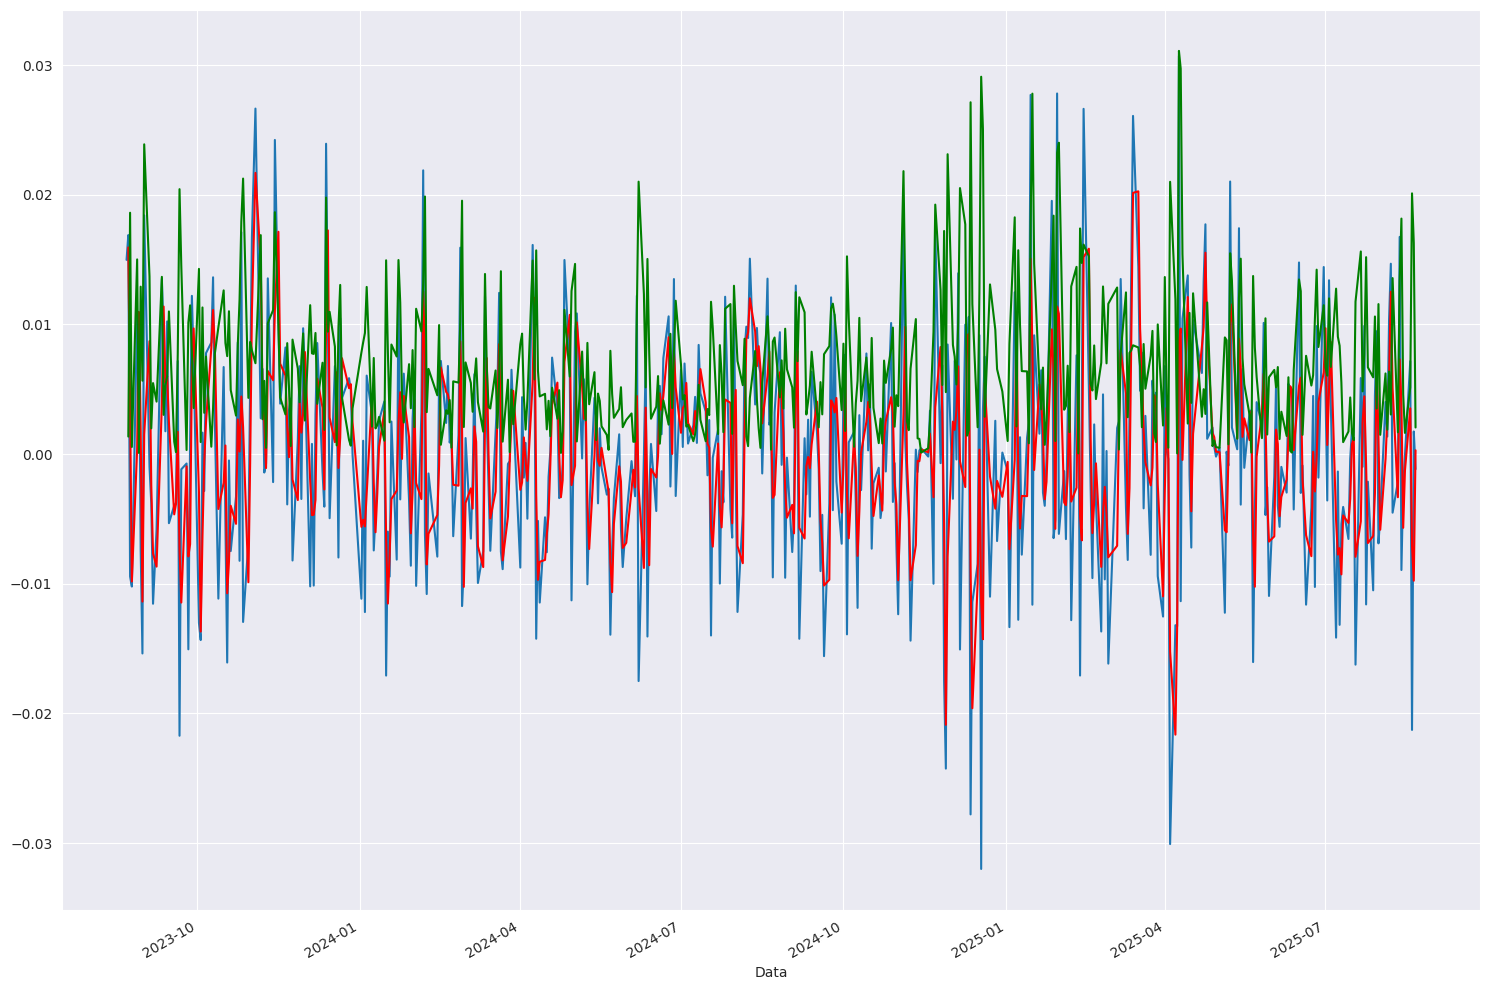

In [87]:
dados_Ultimo_diff = dados_Ultimo_log.diff(1)
ma_diff = dados_Ultimo_diff.rolling(2).mean()

std_diff = dados_Ultimo_diff.rolling(2).std()


f, ax = plt.subplots(figsize=(15,10))
dados_Ultimo_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

X_diff = dados_Ultimo_diff.dropna().values
result_diff = adfuller(X_diff)

print("Teste ADF")
print(f"Teste Estatístico: {result_diff[0]}")
print(f"P-Value: {result_diff[1]}")
print("Valores críticos:")

for key, value in result_diff[4].items():
  print(f"\t{key}: {value}")

In [88]:
# # A segunda diferencial piorou os resultados do teste Adfuller.
# dados_Ultimo_diff_2 = dados_Ultimo_diff.diff(1)
# ma_diff_2 = dados_Ultimo_diff_2.rolling(2).mean()

# std_diff_2 = dados_Ultimo_diff_2.rolling(2).std()

# f, ax = plt.subplots(figsize=(15,10))
# dados_Ultimo_diff_2.plot(ax=ax, legend=False)
# ma_diff_2.plot(ax=ax, legend=False, color='r')
# std_diff_2.plot(ax=ax, legend=False, color='g')
# plt.tight_layout()

# X_diff_2 = dados_Ultimo_diff_2.dropna().values
# result_diff_2 = adfuller(X_diff_2)

# print("Teste ADF")
# print(f"Teste Estatístico: {result_diff_2[0]}")
# print(f"P-Value: {result_diff_2[1]}")
# print("Valores críticos:")

# for key, value in result_diff_2[4].items():
#   print(f"\t{key}: {value}")

# # RESULTADO:
# # Teste ADF
# # Teste Estatístico: -9.070941341548993
# # P-Value: 4.304049389540347e-15
# # Valores críticos:
# # 	1%: -3.4440471158221206
# # 	5%: -2.867580197120949
# # 	10%: -2.5699871918402777

In [89]:
# ARIMA = AR-I-MA
# AR:Autoregressivo,
# I:Integrado,
# MA:Moving Avaerage

# ACF - AutoCorrelation Function
# PACF - Partial AutoCorrelation Function

lag_acf = acf(dados_Ultimo_s, nlags=10)
lag_pacf = pacf(dados_Ultimo_s, nlags=10, method='ywadjusted')

# Com dados com aplicação de diferenciação:
lag_acf_diff = acf(dados_Ultimo_diff, nlags=10)
lag_pacf_diff = pacf(dados_Ultimo_diff, nlags=10, method='ywadjusted')


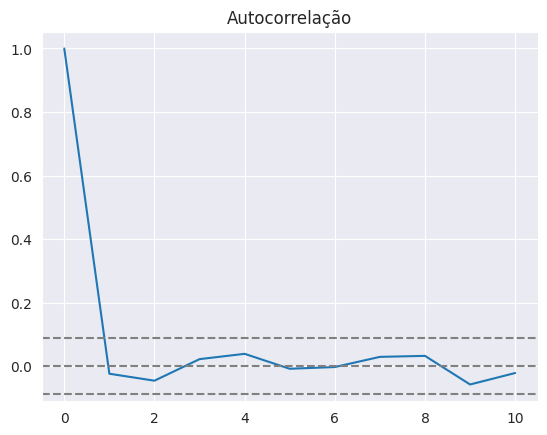

In [90]:
plt.plot(lag_acf)

plt.axhline(y=-1.96/np.sqrt(len(dados_Ultimo_s)),linestyle='--',color='gray')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dados_Ultimo_s)),linestyle='--',color='gray')

plt.title('Autocorrelação')
plt.show()

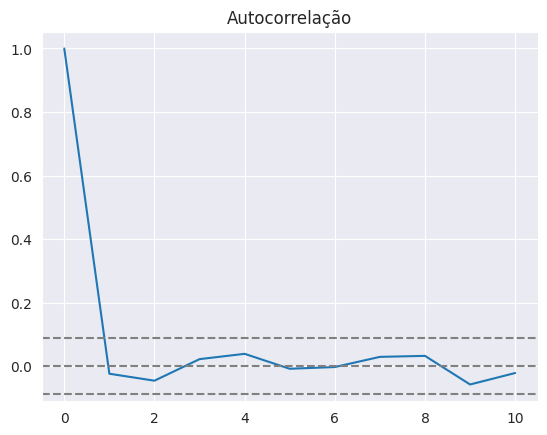

In [91]:
plt.plot(lag_acf)

plt.axhline(y=-1.96/np.sqrt(len(dados_Ultimo_diff)),linestyle='--',color='gray')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dados_Ultimo_diff)),linestyle='--',color='gray')

plt.title('Autocorrelação')
plt.show()

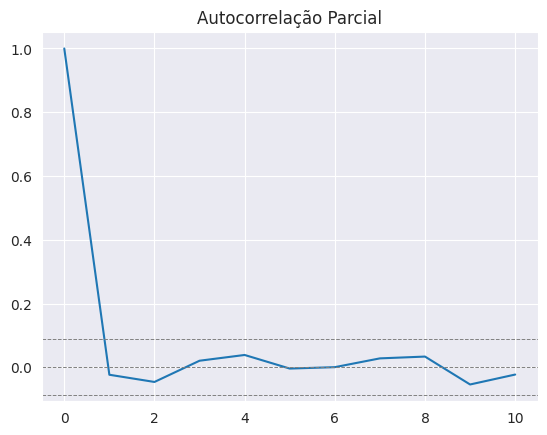

In [92]:
plt.plot(lag_pacf)

plt.axhline(y=-1.96/np.sqrt(len(dados_Ultimo_s)),linestyle='--',color='gray',linewidth=0.7)
plt.axhline(y=0,linestyle='--',color='gray',linewidth=0.7)
plt.axhline(y=1.96/np.sqrt(len(dados_Ultimo_s)),linestyle='--',color='gray',linewidth=0.7)

plt.title('Autocorrelação Parcial')
plt.show()

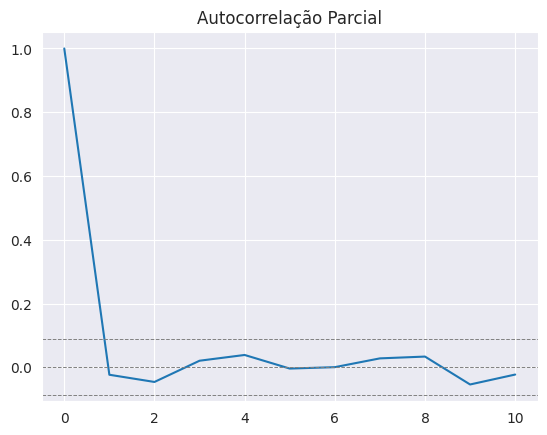

In [93]:
plt.plot(lag_pacf)

plt.axhline(y=-1.96/np.sqrt(len(dados_Ultimo_diff)),linestyle='--',color='gray',linewidth=0.7)
plt.axhline(y=0,linestyle='--',color='gray',linewidth=0.7)
plt.axhline(y=1.96/np.sqrt(len(dados_Ultimo_diff)),linestyle='--',color='gray',linewidth=0.7)

plt.title('Autocorrelação Parcial')
plt.show()

In [94]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

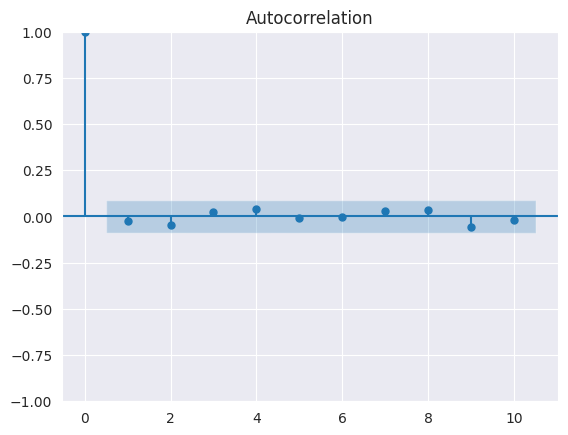

In [95]:
plot_acf(dados_Ultimo_s, lags=10)
plt.show()

In [96]:
# plot_acf(dados_Ultimo_diff, lags=2)
# plt.show()

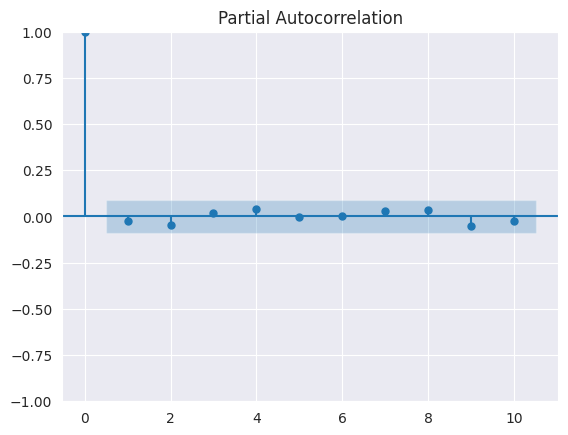

In [97]:
plot_pacf(dados_Ultimo_s, lags=10)
plt.show()

In [98]:
# plot_pacf(dados_Ultimo_diff, lags=20)
# plt.show()

In [99]:
# ===============================================
# AutoARIMA - Encontrando a ordem automaticamente
# ===============================================

# Instalar:
!pip install pmdarima

In [100]:
# from pmdarima import auto_arima

# # Encontrar automaticamente a melhor ordem
# modelo_auto = auto_arima(
#     dados_Ultimo_diff,
#     start_p=1,
#     start_q=1,
#     max_p=3,
#     max_q=3,
#     seasonal=20,  #seasonal=False,  # para ARIMA simples
#     trace=True,
#     error_action='ignore',
#     suppress_warnings=True
# )

# print(f"Melhor ordem encontrada: {modelo_auto.order}")

In [101]:
# !pip uninstall numpy -y
# !pip uninstall pmdarima -y
# !pip install numpy
# !pip install pmdarima

In [102]:
# PONTO DE PARADA


In [103]:
# # instala a biblioteca statsforcast
# !pip install statsforecast

In [110]:
# copiando base de dados para utilização do statsforcast
df_statsforecast = dados_Ultimo_diff.copy()
df_statsforecast.tail()

,Ultimo
Data,
2025-08-15,-0.000110
2025-08-18,0.007169
2025-08-19,-0.021270
2025-08-20,0.001747
2025-08-21,-0.001159


In [108]:
# Cria coluna de média móvel para 5 dias
df_statsforecast["MedMov5Dias"] = df_statsforecast["Ultimo"].rolling(window=5).mean()
# df_statsforecast["MedMov10Dias"] = df_statsforecast["Ultimo"].rolling(window=10).mean()
# df_statsforecast["MedMov30Dias"] = df_statsforecast["Ultimo"].rolling(window=30).mean

# Cria coluna categorica com as classes "Up" e "Down" que identifica a direção do movimento diário.
#df_statsforecast['Daily_Direction'] = np.where(df_statsforecast['Ultimo'] > df_statsforecast['Abertura'], 1, 0)
df_statsforecast['Daily_Direction'] = np.where(df_statsforecast['Ultimo'] > 0, True, False)

# Formatando base de dados para o padrão de series temporais
df_statsforecast.drop(labels=['Maxima', 'Minima', 'Volume','Data'], axis=1, inplace=True)
df_statsforecast.reset_index(inplace=True)
df_statsforecast.rename(columns={'Data':'ds'
                               , 'Daily_Direction':'unique_id'
                               , 'Ultimo':'y'}, inplace=True)
#df_statsforecast.set_index('ds', inplace=True)

# ver dados
df_statsforecast.head(10)

KeyError: 'Ultimo'

In [ ]:
# # setando ds como indice de teste
# teste.set_index('ds', inplace=True)
# teste.head()

In [109]:
# Separando os dados em grupo de treinamento e grupo de teste (validação).
treino = df_statsforecast.loc[df_statsforecast['ds'] < '2025-07-20']
teste = df_statsforecast.loc[(df_statsforecast['ds'] >= '2025-07-20') & (df_statsforecast['ds'] < '2025-08-20')]
h = teste['ds'].nunique()
print(f"h = {h}")
print(f"Treino: {treino.shape}")
print(f"Teste: {teste.shape}")

KeyError: 'ds'

In [ ]:
treino.info()
treino.tail()

In [ ]:
teste.info()
teste.head()

In [ ]:
def wmape(y_true, y_pred):
  return np.abs(y_true-y_pred).sum() / np.abs(y_true).sum()

In [ ]:
!pip install statsforecast

In [ ]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA

In [ ]:
treino['unique_id'] = 'BVSP'
#treino['unique_id'] = 'y'
# treino = treino.drop(columns=['Daily_Direction']) # Remove the string column - This column should be dropped before splitting into treino and teste
model = StatsForecast(models=[Naive()], freq='B', n_jobs=-1)
model.fit(treino)

forecast_df = model.predict(h=h, level=[90])

wmape1 = wmape(teste['y'].values, forecast_df['Naive'].values) # Calculate WMAPE using the actual test values
print(f"WMAPE: {wmape1:.2%}")

model.plot(treino, forecast_df, level=[90], unique_ids=['BVSP'], engine ='matplotlib', max_insample_length=90) # Plot using the forecast_df directly
# model.plot(treino, forecast_df, level=[90], y=['y'],engine ='matplotlib', max_insample_length=90)


In [ ]:
######################################################################################################################################################
#model_s = StatsForecast(models=[SeasonalNaive(season_length=252)], freq='B', n_jobs=-1)
model_s = StatsForecast(models=[SeasonalNaive(season_length=252)], freq='B', n_jobs=-1)
model_s.fit(treino)

forecast_dfs = model_s.predict(h=h, level=[90])

wmape2 = wmape(teste['y'].values, forecast_dfs['SeasonalNaive'].values) # Calculate WMAPE using the actual test values
print(f"WMAPE: {wmape2:.2%}")

model_s.plot(treino, forecast_dfs, level=[90], unique_ids=['BVSP'],engine ='matplotlib', max_insample_length=90) # Plot using the forecast_dfs directly
########################################################################################################################################################


In [ ]:
# Dias úteis
forecast_dfs.info()
forecast_dfs.tail(55)

In [ ]:
#type(teste)
# Ultimo	Abertura
# Cria coluna categorica com as classes "0" e "1" que identifica a direção do movimento diário.
dados['Direcao'] = np.where(dados['Ultimo'] > dados['Abertura'], 1, 0)
dados.info()
dados.tail(70)

In [ ]:
# Validação
dataPrevisao = '2025-07-20'
y_valida_dados = dados.loc[dados['Data'] >= dataPrevisao].drop(labels=['Ultimo', 'Abertura', 'Maxima', 'Minima', 'Volume', 'Data'], axis=1)
y_valida_dados.info()
y_valida_dados.head(70)

In [ ]:
# # criar um dataframe com indice Data e com coluna Direcao
# y_valida_dados = y_valida_dados[['Data', 'Direcao']]
# #y_valida_dados = y_valida_dados['Direcao']
# y_valida_dados.info()
# y_valida_dados.head()

In [ ]:
# Criar dataframe a partir do data frame chamadao forecast_dfs com indice ds e campo Direcao
forecast_dfs = forecast_dfs.reset_index()
forecast_dfs.set_index('ds', inplace=True)
forecast_dfs.info()
forecast_dfs.tail(55)

# y_prev = forecast_dfs['Direcao']
# y_prev.info()
# y_prev.head(45)

In [ ]:
# Apagar os campos unique_id	SeasonalNaive	SeasonalNaive-lo-90	SeasonalNaive-hi-90	SeasonalNaive_shift
forecast_dfs.drop(labels=['index', 'unique_id', 'SeasonalNaive-lo-90', 'SeasonalNaive-hi-90'], axis=1, inplace=True)
forecast_dfs.head(20)

In [ ]:
# renomear o indice do dataframe forecast_dfs de "ds" para "data".
forecast_dfs.index.name = 'Data'
forecast_dfs.head(15)

In [ ]:
forecast_dfs["SeasonalNaive_shift"] = forecast_dfs["SeasonalNaive"].shift(1)
forecast_dfs.head(15)

In [ ]:
# Cria coluna categorica com as classes "0" e "1" que identifica a direção do movimento diário.
forecast_dfs['Direcao_forecast'] = np.where(forecast_dfs['SeasonalNaive'] > forecast_dfs['SeasonalNaive_shift'], 1, 0)
forecast_dfs.info()
forecast_dfs.tail(70)

In [ ]:
# Efetuar um left merge  no dataframe y_valida_dados pelos indice "ds" e "Data" juntando os campos direcao.
dt_valida = y_valida_dados.merge(forecast_dfs, on='Data', how='left')
dt_valida.info()
dt_valida.tail(38)

# dt_valida = y_valida_dados.merge(forecast_dfs, on='Data', how='left')
# dt_valida.info()
# dt_valida.head()

In [ ]:
# Alterar o tipo do campo "Direcao_y" do dataframe dt_valida de float para int.
dt_valida['Direcao'] = dt_valida['Direcao'].astype(bool)
dt_valida['Direcao_forecast'] = dt_valida['Direcao_forecast'].astype(bool)
dt_valida.info()
dt_valida.head(50)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(dt_valida['Direcao'], dt_valida['Direcao_forecast'])
print("Confusion Matrix:")
print(cm)

cm = metrics.confusion_matrix(dt_valida['Direcao_forecast'], dt_valida['Direcao'])

sns.heatmap(cm, annot=True, fmt='.0f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )

plt.ylabel('Classificação Real')
plt.xlabel('Predição Modelo')
plt.title('Modelo: Regresão Logística com Dados Balanceados')

In [ ]:
# modelo SeasonalNaive
forecast_dfs["SeasonalNaive_shift"] = forecast_dfs["SeasonalNaive"].shift(1)
forecast_dfs.head(15)

# Cria coluna categorica com as classes "0" e "1" que identifica a direção do movimento diário.
forecast_dfs['Direcao_forecast'] = np.where(forecast_dfs['SeasonalNaive'] > forecast_dfs['SeasonalNaive_shift'], 1, 0)
forecast_dfs.info()
forecast_dfs.tail(70)

# Efetuar um left merge  no dataframe y_valida_dados pelos indice "ds" e "Data" juntando os campos direcao.
dt_valida = y_valida_dados.merge(forecast_dfs, on='Data', how='left')
dt_valida.info()
dt_valida.tail(38)

# Alterar o tipo do campo "Direcao_y" do dataframe dt_valida de float para int.
dt_valida['Direcao'] = dt_valida['Direcao'].astype(bool)
dt_valida['Direcao_forecast'] = dt_valida['Direcao_forecast'].astype(bool)
dt_valida.info()
dt_valida.head(50)

# Imprime matriz de confusão.
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(dt_valida['Direcao'], dt_valida['Direcao_forecast'])
print("Confusion Matrix:")
print(cm)

cm = metrics.confusion_matrix(dt_valida['Direcao_forecast'], dt_valida['Direcao'])

sns.heatmap(cm, annot=True, fmt='.0f', xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )

plt.ylabel('Classificação Real')
plt.xlabel('Predição Modelo')
plt.title('Modelo: Regresão Logística com Dados Balanceados')

In [ ]:
# PONTO DE PARADA
# Merge entre "SeasonalNaive_shift" e data frame teste pelo campo "ds"
teste['unique_id'] = teste['unique_id'].astype(str) # Convert 'unique_id' to object type in teste
forecast_dfs = forecast_dfs.merge(teste, on=['ds', 'unique_id'], how='left')
forecast_dfs.head()

In [ ]:
model_sm = StatsForecast(models=[SeasonalWindowAverage(season_length=252, window_size=2)], freq='B', n_jobs=-1) # Removed prediction_intervals=True
model_sm.fit(treino)

forecast_dfsm = model_sm.predict(h=h) # Removed level=[90]
#forecast_dfsm = forecast_dfsm.reset_index().merge(teste, on=['ds', 'unique_id'], how='left')
forecast_dfsm = forecast_dfsm.merge(teste, on=['ds', 'unique_id'], how='left')

display(forecast_dfsm.tail(15))
display(forecast_dfsm.columns)

wmape3 = wmape(forecast_dfsm['y'].values, forecast_dfsm['SeasWA'].values) # Corrected model name in WMAPE calculation
print(f"WMAPE: {wmape3:.2%}")

model_sm.plot(treino, forecast_dfsm, unique_ids=['BVSP'],engine ='matplotlib', max_insample_length=90) # Removed level=[90]

In [ ]:
# ===========================
# ATENÇÂO CELULA COM PROBLEMA
# ===========================

# model_a = StatsForecast(models=[Naive(),AutoARIMA(season_length=252), SeasonalNaive(season_length=7)], freq='B', n_jobs=-1)
model_a = StatsForecast(models=[AutoARIMA(season_length=252)], freq='B', n_jobs=-1)


treino_arima = treino.drop(columns=['MedMov5Dias']) # Remove MedMov5Dias for ARIMA
model_a.fit(treino_arima)

# forecast_dfa = model_a.predict(h=h, level=[90])
# forecast_dfa = forecast_dfa.reset_index().merge(teste, on=['ds', 'unique_id'], how='left') # Moved merge after plotting

# forecast_dfa = model_a.predict(h=h, level=[90])
# forecast_dfa = forecast_dfa.reset_index().merge(teste, on=['ds', 'unique_id'], how='left') # Moved merge after plotting
forecast_dfa = model_a.predict(h=h, level=[90], X_df=teste[['ds', 'unique_id', 'Abertura']])


wmape4 = wmape(teste['y'].values, forecast_dfa['AutoARIMA'].values) # Calculate WMAPE using the actual test values
print(f"WMAPE: {wmape4:.2%}")

model_a.plot(treino, forecast_dfa, level=[90], unique_ids=['BVSP'],engine ='matplotlib', max_insample_length=90) # Plot using the forecast_dfa directly

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(df_confusion['y'], df_confusion['yhat_binary'])
print("Confusion Matrix:")
print(cm)

In [ ]:
# utiliza a biblioteca prophet
!pip install prophet

In [ ]:
# carrega biblioteca prophet
from prophet import Prophet
import prophet

# verifica versão da biblioteca
print('Versão do Prophet => %s' % prophet.__version__ )

In [ ]:
# copia os dados do Dataframe "dados" para usar com a biblioteca prophet.
df_dados_prophet = dados.copy().drop(labels=['Data'], axis=1)

# verificando base de dados
df_dados_prophet.info()
df_dados_prophet.head()

In [ ]:
# Apaga indice como tipo "datetima"
df_dados_prophet = df_dados_prophet.reset_index()
# df_dados_prophet = df_dados_prophet.reset_index().rename(columns={'Data':'ds', 'Ultimo':'y'})

# mostra dados
df_dados_prophet.info()
df_dados_prophet.head()

In [ ]:
# biblioteca prophet trabalh com apenas 2 colunas chamadas DS e Y.

# Apaga colunas 'High', 'Low', 'Close' e 'Volume'
df_dados_prophet.drop(labels=['Abertura', 'Maxima', 'Minima', 'Volume'], axis=1, inplace=True)

df_dados_prophet.info()
df_dados_prophet.head()


In [ ]:
#renomeia colunas 'Date' e 'Open' para 'ds' e 'y'
df_dados_prophet.rename(columns={'Data':'ds',
                                 'Ultimo':'y'},
                        inplace=True)

# mostra dados
df_dados_prophet.head()

In [ ]:
# Separar os dados do dataframe em 2 grupos, um de treinamento para o modelo e outro para validação:

# Dados de treino
df_prophet_treino = df_dados_prophet.loc[df_dados_prophet['ds'] < '2025-05-01']

# Dados de teste (validação)
df_prophet_teste = df_dados_prophet.loc[df_dados_prophet['ds'] >= '2025-05-01']

In [ ]:
# Verificando dados de treino:
df_prophet_treino.info()
df_prophet_treino.head()

In [ ]:
# Verificando dados de teste:
df_prophet_teste.info()
df_prophet_teste.head()

In [ ]:
# Roda o algoritmo "fit" para contruir um modelo preditivo.
m = Prophet()
df_prophet_treino['ds'] = df_prophet_treino['ds'].dt.tz_localize(None)
m.fit(df_prophet_treino)

In [ ]:
# Número de dias previstos 252 -a partir de 02-01-2025 (02 de fevereiro de 2015)
future = m.make_future_dataframe(periods=252)
future.head()

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
# # modelo prophet com variação binaria da variavel target.
df_dados_prophet_bin = df_dados_prophet.copy()

In [ ]:
# copiando coluna de verificação
df_dados_prophet_bin['col_conf']=df_dados_prophet_bin['y']
df_dados_prophet_bin.head()

In [ ]:
# variável target como binária.
df_dados_prophet_bin['y'] = np.where(df_dados_prophet_bin['y'].shift(-1) > df_dados_prophet_bin['y'], 1, 0)

In [ ]:
df_dados_prophet_bin.head(30)

In [ ]:
df_dados_prophet_bin.tail(30)

# apóss conferencia, retirar a coluna col_conf
df_dados_prophet_bin.drop(labels=['col_conf'], axis=1, inplace=True)

In [ ]:
# Visualizando noda dataframe.
df_dados_prophet_bin.info()
df_dados_prophet_bin.head()

In [ ]:
# Dados de treino
df_prophet_treino_bin = df_dados_prophet_bin.loc[df_dados_prophet_bin['ds'] < '2025-05-01']

# Dados de teste (validação)
df_prophet_teste_bin = df_dados_prophet_bin.loc[df_dados_prophet_bin['ds'] >= '2025-05-01']

In [ ]:
# Verificando dados de treino:
df_prophet_treino_bin.info()
df_prophet_treino_bin.head()

In [ ]:
df_prophet_teste_bin.info()
df_prophet_teste_bin.head()

In [ ]:
# Roda o algoritmo "fit" para contruir um modelo preditivo.
m_bin = Prophet()
m_bin.fit(df_prophet_treino_bin)

In [ ]:
# Número de dias previstos 252 -a partir de 02-01-2025 (02 de fevereiro de 2015)
future_bin = m_bin.make_future_dataframe(periods=252)
#future_bin.head()
future_bin.tail()

In [ ]:
forecast_bin = m_bin.predict(future_bin)
forecast_bin[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(50)

# Task
Calculate and display the confusion matrix for the model's predictions on the test set.

## Prepare data

### Subtask:
Create a DataFrame with actual and forecasted daily directions for the test set.


**Reasoning**:
Create a new DataFrame for confusion matrix calculation, add the actual values from the test set, and filter the forecasted binary predictions to align with the test set dates.



In [ ]:
# Create a new DataFrame for confusion matrix
df_confusion = df_prophet_teste.copy()

# Filter forecast_bin to include only dates in the test set and get the 'yhat' predictions
forecast_test_dates = forecast_bin[forecast_bin['ds'].isin(df_prophet_teste['ds'])]

# Add 'yhat_binary' column to df_confusion
df_confusion['yhat_binary'] = forecast_test_dates['yhat'].values

# Convert 'yhat_binary' to binary based on a threshold (e.g., 0.5)
df_confusion['yhat_binary'] = (df_confusion['yhat_binary'] > 0.5).astype(int)

# Display the head of the new DataFrame
display(df_confusion.head())
display(df_confusion.info())

**Reasoning**:
The error indicates that `df_prophet_teste` is not defined. I need to redefine `df_prophet_teste` and `df_dados_prophet_bin` as they might have been cleared from the environment. Then I can proceed with creating the confusion matrix dataframe.



In [ ]:
# Re-create df_dados_prophet_bin and df_prophet_teste_bin
df_dados_prophet_bin = dados.copy().drop(labels=['Data'], axis=1)
df_dados_prophet_bin = df_dados_prophet_bin.reset_index()
df_dados_prophet_bin.drop(labels=['Abertura', 'Maxima', 'Minima', 'Volume'], axis=1, inplace=True)
df_dados_prophet_bin.rename(columns={'Data':'ds',
                                 'Ultimo':'y'},
                        inplace=True)
df_dados_prophet_bin['y'] = np.where(df_dados_prophet_bin['y'].shift(-1) > df_dados_prophet_bin['y'], 1, 0)
df_prophet_treino_bin = df_dados_prophet_bin.loc[df_dados_prophet_bin['ds'] < '2025-05-01']
df_prophet_teste_bin = df_dados_prophet_bin.loc[df_dados_prophet_bin['ds'] >= '2025-05-01']


# Create a new DataFrame for confusion matrix
df_confusion = df_prophet_teste_bin.copy()

# Filter forecast_bin to include only dates in the test set and get the 'yhat' predictions
forecast_test_dates = forecast_bin[forecast_bin['ds'].isin(df_prophet_teste_bin['ds'])]

# Add 'yhat_binary' column to df_confusion
df_confusion['yhat_binary'] = forecast_test_dates['yhat'].values

# Convert 'yhat_binary' to binary based on a threshold (e.5)
df_confusion['yhat_binary'] = (df_confusion['yhat_binary'] > 0.5).astype(int)

# Display the head of the new DataFrame
display(df_confusion.head())
display(df_confusion.info())

**Reasoning**:
The error indicates that `forecast_bin` is not defined. I need to regenerate `forecast_bin` by fitting the Prophet model again and making future predictions. Then I can proceed with creating the confusion matrix dataframe.



In [ ]:
# Re-fit the Prophet model and generate forecast_bin
m_bin = Prophet()
m_bin.fit(df_prophet_treino_bin)
future_bin = m_bin.make_future_dataframe(periods=252)
forecast_bin = m_bin.predict(future_bin)

# Create a new DataFrame for confusion matrix
df_confusion = df_prophet_teste_bin.copy()

# Filter forecast_bin to include only dates in the test set and get the 'yhat' predictions
forecast_test_dates = forecast_bin[forecast_bin['ds'].isin(df_prophet_teste_bin['ds'])]

# Add 'yhat_binary' column to df_confusion
df_confusion['yhat_binary'] = forecast_test_dates['yhat'].values

# Convert 'yhat_binary' to binary based on a threshold (e.5)
df_confusion['yhat_binary'] = (df_confusion['yhat_binary'] > 0.5).astype(int)

# Display the head of the new DataFrame
display(df_confusion.head())
display(df_confusion.info())

**Reasoning**:
The error indicates that `Prophet` is not defined. I need to re-import the `Prophet` class from the `prophet` library. Then I can proceed with re-fitting the model, generating the forecast, and creating the confusion matrix dataframe.



In [ ]:
from prophet import Prophet

# Re-fit the Prophet model and generate forecast_bin
m_bin = Prophet()
m_bin.fit(df_prophet_treino_bin)
future_bin = m_bin.make_future_dataframe(periods=252)
forecast_bin = m_bin.predict(future_bin)

# Create a new DataFrame for confusion matrix
df_confusion = df_prophet_teste_bin.copy()

# Filter forecast_bin to include only dates in the test set and get the 'yhat' predictions
forecast_test_dates = forecast_bin[forecast_bin['ds'].isin(df_prophet_teste_bin['ds'])]

# Add 'yhat_binary' column to df_confusion
df_confusion['yhat_binary'] = forecast_test_dates['yhat'].values

# Convert 'yhat_binary' to binary based on a threshold (e.5)
df_confusion['yhat_binary'] = (df_confusion['yhat_binary'] > 0.5).astype(int)

# Display the head of the new DataFrame
display(df_confusion.head())
display(df_confusion.info())